# Tesis

## Librrerías y datos

In [1]:

from google.colab import drive
from tensorflow.python.ops.nn_ops import softmax
from keras import backend as k
import numpy as np
from matplotlib.gridspec import GridSpec
from IPython import display
from scipy.optimize import linprog
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import matplotlib. pyplot as plt
from keras.layers import Activation,Dense,Input,BatchNormalization,Dropout,Conv1D,Flatten,MaxPool1D,Dot,Reshape,Conv2D,Concatenate,ReLU,Lambda,MaxPooling2D,Normalization
import cvxpy as cp
import tensorflow as tf
from keras import Model
from IPython import display
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import warnings
import pandas as pd
from IPython import display
path='/content/drive/MyDrive/Maestría/Optimización/Data/'
from keras.models import Sequential
mse=mean_squared_error
mae=mean_absolute_error
mape=mean_absolute_percentage_error
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.callbacks import Callback
from typing import Tuple
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/Shareddrives/red_gas_col/Prueba')
from My_Functions.Object1 import Evaluate,FlyEvaluate
from My_Functions.Object3 import flow_model, plots, gen_w, plot_time, ng_case_evaluate, ng_evaluate_atip, visualize_atipic, visualize_non_convergence, identify_atypical_values, dynamic_val, loss_val, bounded

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


flow_model,-------------------- flow_model
plots,------------------------- plots
GenW---------------------------- gen_w
plot_time,---------------------- plot_time
Ng_case_Evaluate,--------------- ng_case_evaluate
Ng_case_Evaluate_atip,----------- ng_evaluate_atip
identificar_atipicos,---------------- visualize_atipic
no_com,--------------------------- visualize_non_convergence
identificar_atipicos_val,--------- identify_atypical_values
dynamic_val,----------------------  dynamic_val
loss_val, -------------------------  loss_val
bounded ------------------------   bounded

#Objetivo 2

In [ ]:
loss_val()

In [ ]:
# Paso 1: Generar el comportamiento sinusoidal deseado
x = np.linspace(0, 2 * np.pi, 1000)  # Genera valores de x desde 0 a 2*pi
amplitud = 150                         # Amplitud del seno
frecuencia = 1                       # Frecuencia del seno
seno = abs(amplitud * np.sin(frecuencia * x) ) # Genera el seno

# Paso 2: Crear una matriz de datos aleatorios
datos = np.random.rand(1000, 18)  # Datos aleatorios

# Paso 3: Ajustar los datos aleatorios
# La idea es escalar los datos de tal manera que su suma a lo largo de las filas sea igual al valor del seno correspondiente
suma_datos = np.sum(datos, axis=1)  # Suma actual de los datos a lo largo de las filas
factor_ajuste = seno / suma_datos  # Factor de ajuste para cada fila

# Ajustar los datos
for i in range(datos.shape[1]):
    datos[:, i] *= factor_ajuste
X_test=datos
s1='/content/drive/Shareddrives/red_gas_col/'
s2='/content/drive/Shareddrives/red_gas_col/Prueba/Data/'
modelpath='modelCol.h5'
filepath='ng_caseCol_18.xlsx'
path=s1+filepath
Data_inf=pd.read_excel(path,sheet_name='node.info')
Data_D=pd.read_excel(path,sheet_name='node.dem')
Data_Dc=pd.read_excel(path,sheet_name='node.demcost')
Data_W=pd.read_excel(path,sheet_name='well')
Data_T=pd.read_excel(path,sheet_name='pipe')
Data_C=pd.read_excel(path,sheet_name='comp')
Data_sto=pd.read_excel(path,sheet_name='sto')
Cost=np.concatenate((Data_W['Cg'].values,Data_T['C_O'].values,Data_C['costc'],Data_Dc['al_Res'].values,
            Data_Dc['al_Ind'].values,Data_Dc['al_Com'].values,Data_Dc['al_NGV'].values,Data_Dc['al_Ref'].values,Data_Dc['al_Pet'].values,
                Data_sto['C_S+'].values-Data_sto['C_V'].values,-1*(Data_sto['C_S-']-Data_sto['C_V']).values,Data_sto['C_V'].values)).reshape(-1,1)
w=gen_w(Data_inf,Data_W,Data_T,Data_C,Data_Dc,Data_sto)
fd=X_test.max(axis=0)
# Suponiendo que Fd, Fw y datos son tus datos.
plt.figure(figsize=(15, 5))
model2=flow_model(path,fd,seeds=1,s=1)
model2.load_weights(s2+modelpath)
model_A = tf.keras.Model(inputs=model2.inputs,outputs=model2.get_layer('F').output)
model_B= tf.keras.Model(inputs=model2.inputs,outputs=model2.get_layer('P').output)
i=len(Data_W)+len(Data_C)+len(Data_T)
j=len(Data_inf)


Fd1=model_A.predict(X_test,verbose=False)[:,i:i+j]

Fw=model_A.predict(X_test,verbose=False)[:,0]

model2=flow_model(path,fd,seeds=1,s=0)
modelpath='model2_Col.h5'
model2.load_weights(s2+modelpath)
model_A = tf.keras.Model(inputs=model2.inputs,outputs=model2.get_layer('F').output)
model_B= tf.keras.Model(inputs=model2.inputs,outputs=model2.get_layer('P').output)
i=len(Data_W)+len(Data_C)+len(Data_T)
j=len(Data_inf)
Fd=model_A.predict(X_test,verbose=False)[:,i:i+j]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Ajusta figsize según sea necesario

# Gráfica para Unsupplied Gas
axs[0].plot(Fd.sum(axis=1), label="Unsupplied Gas")
axs[0].plot(Fd1.sum(axis=1), label="Dynamic-Unsupplied Gas")
axs[0].plot(Fw, label="Dynamic-Gas Supply")
axs[0].plot(datos.sum(axis=1), label="Total Demand",linestyle='--',color='black')
axs[0].set_xlabel("Samples", fontsize=20)
axs[0].set_ylabel("Flows", fontsize=20)
axs[0].legend()
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

# Gráfica para Dynamic Gas Balance y Total Demand
axs[1].plot(Fd1.sum(axis=1)+Fw, label="Dynamic Gas Balance",color='orange')
axs[1].plot(Fd.sum(axis=1)+Fw, label="Gas Balance")  # Asegúrate de que esta operación sea correcta
axs[1].plot(datos.sum(axis=1), label="Total Demand", linestyle='--',color='black')
axs[1].set_xlabel("Samples", fontsize=20)
axs[1].set_ylabel("Flows", fontsize=20)
axs[1].legend()
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

# Ajusta el layout y muestra la figura completa
plt.tight_layout()
plt.show()

In [ ]:
bounded(s=1)

In [ ]:
Balance,Weymouth,PjPi,Costos=ng_case_evaluate(s=0)

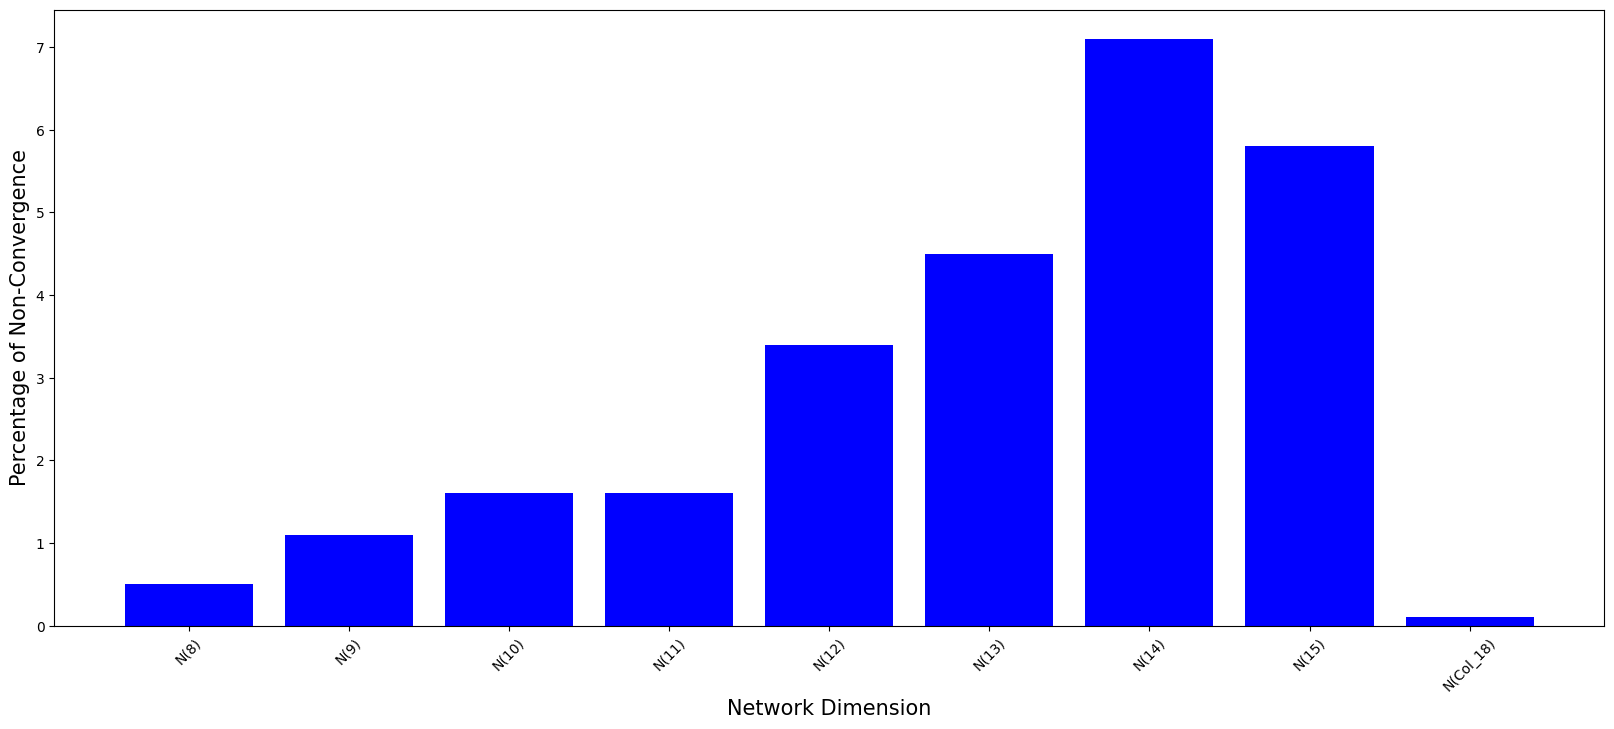

In [2]:
visualize_non_convergence()

# Objetivo 3

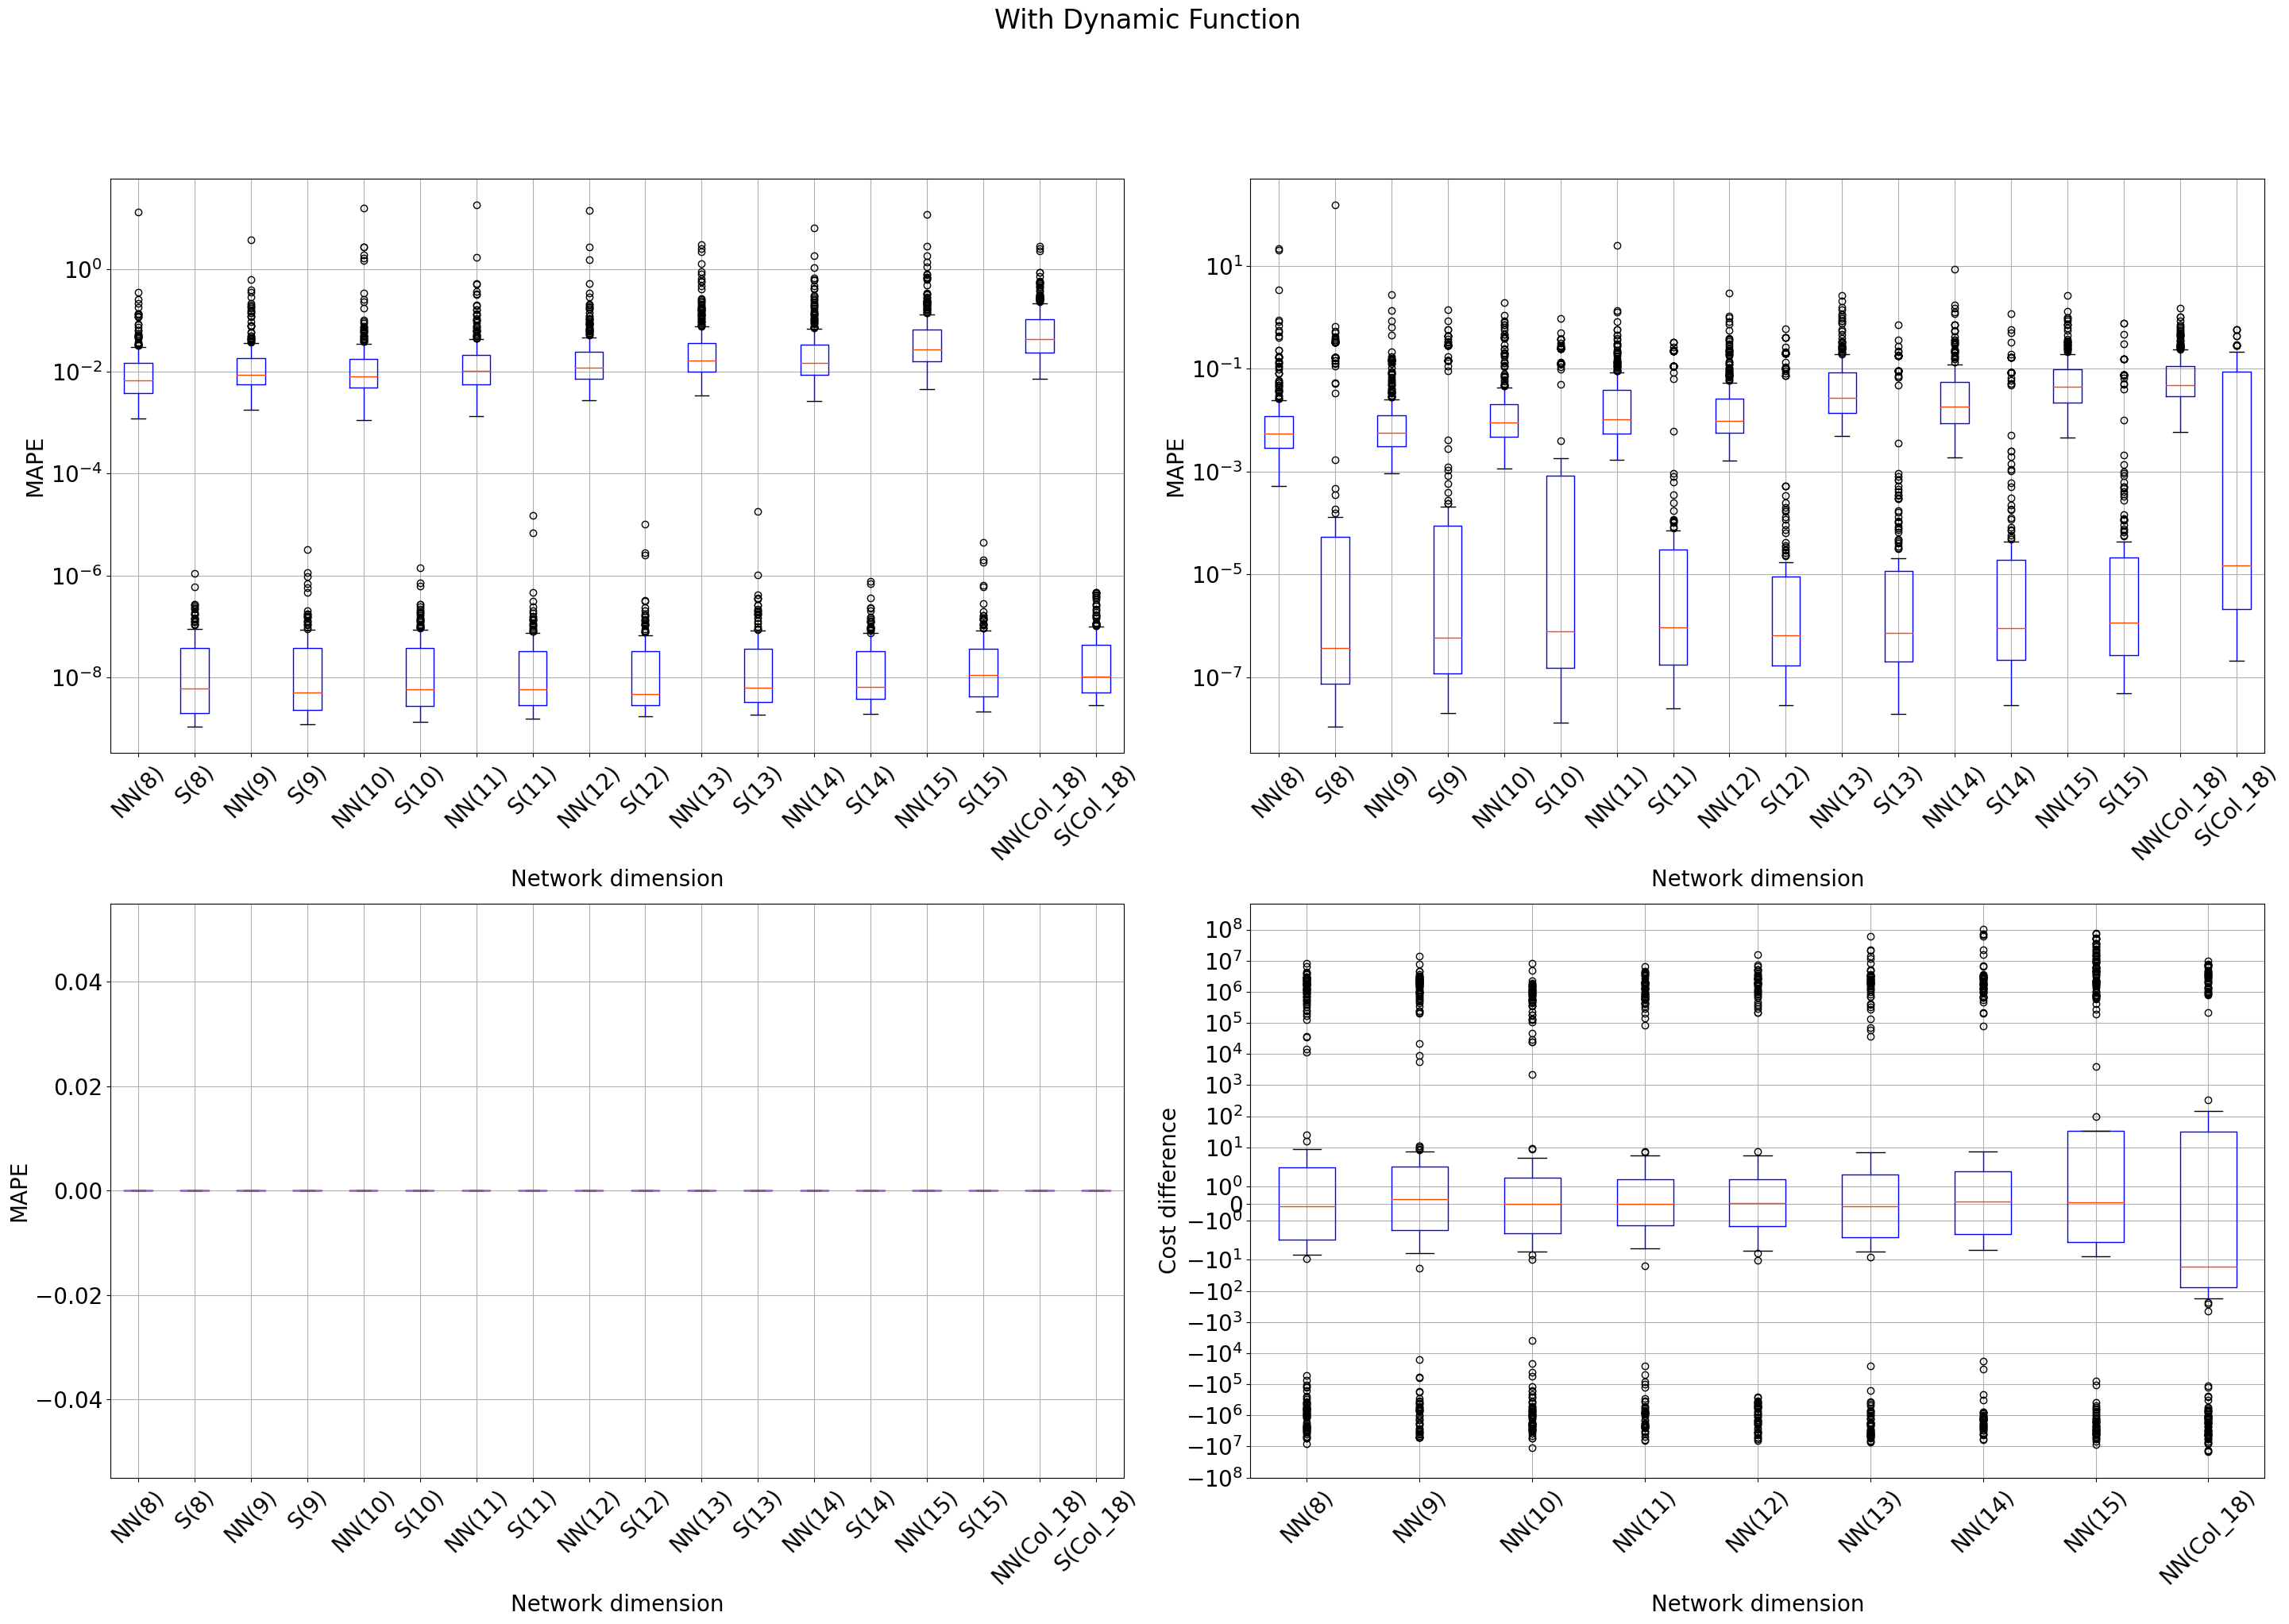

In [4]:
Balance,Weymouth,PjPi,Costos= ng_case_evaluate(s=1)

Porcentaje de atípicos: Balance de nodos


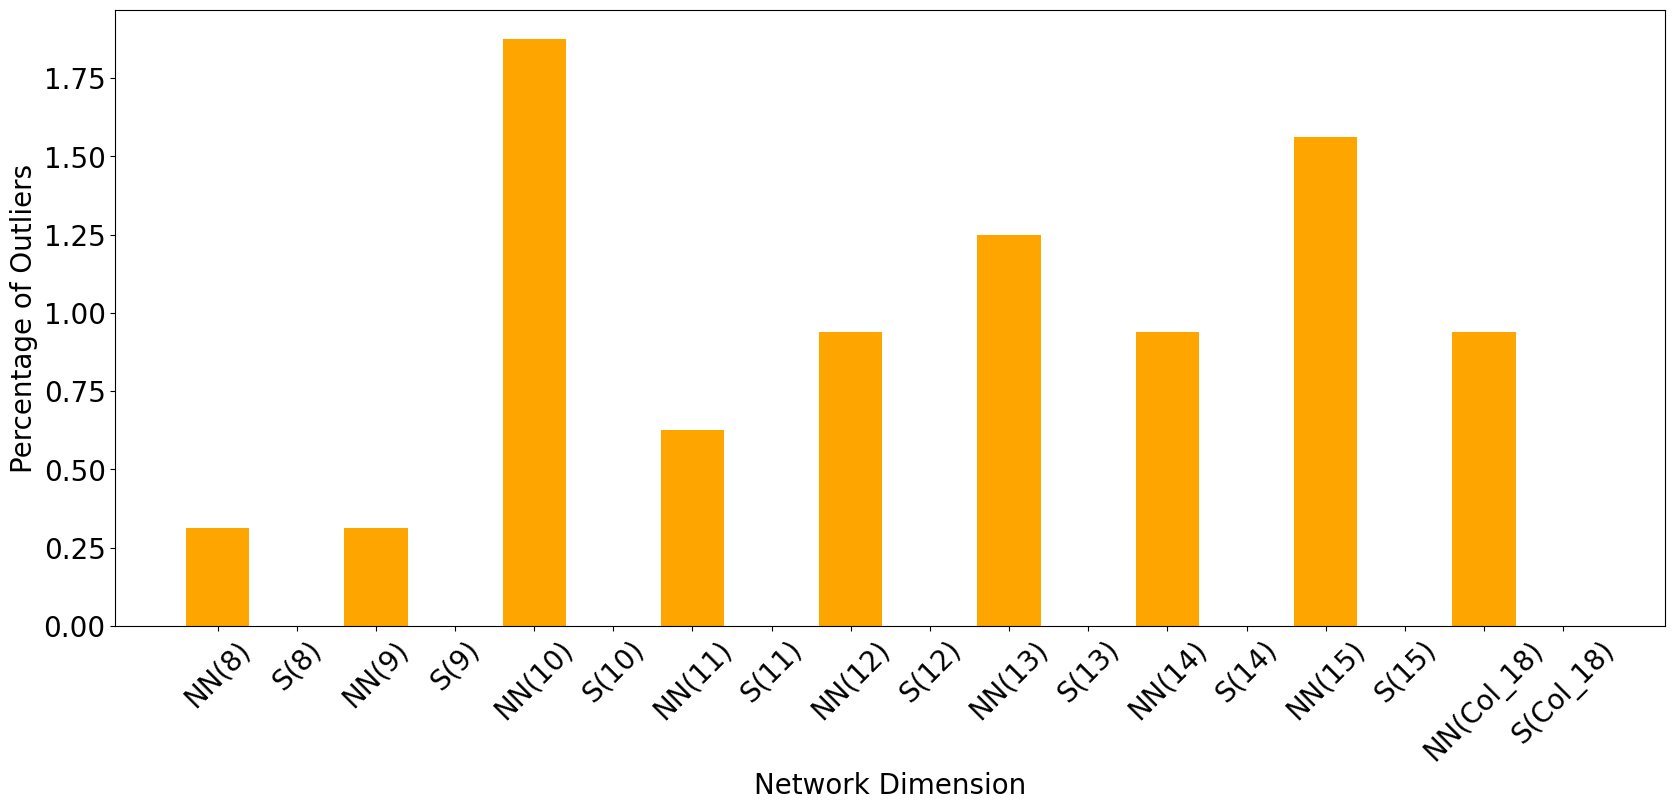

Porcentaje de atípicos: Weymouth


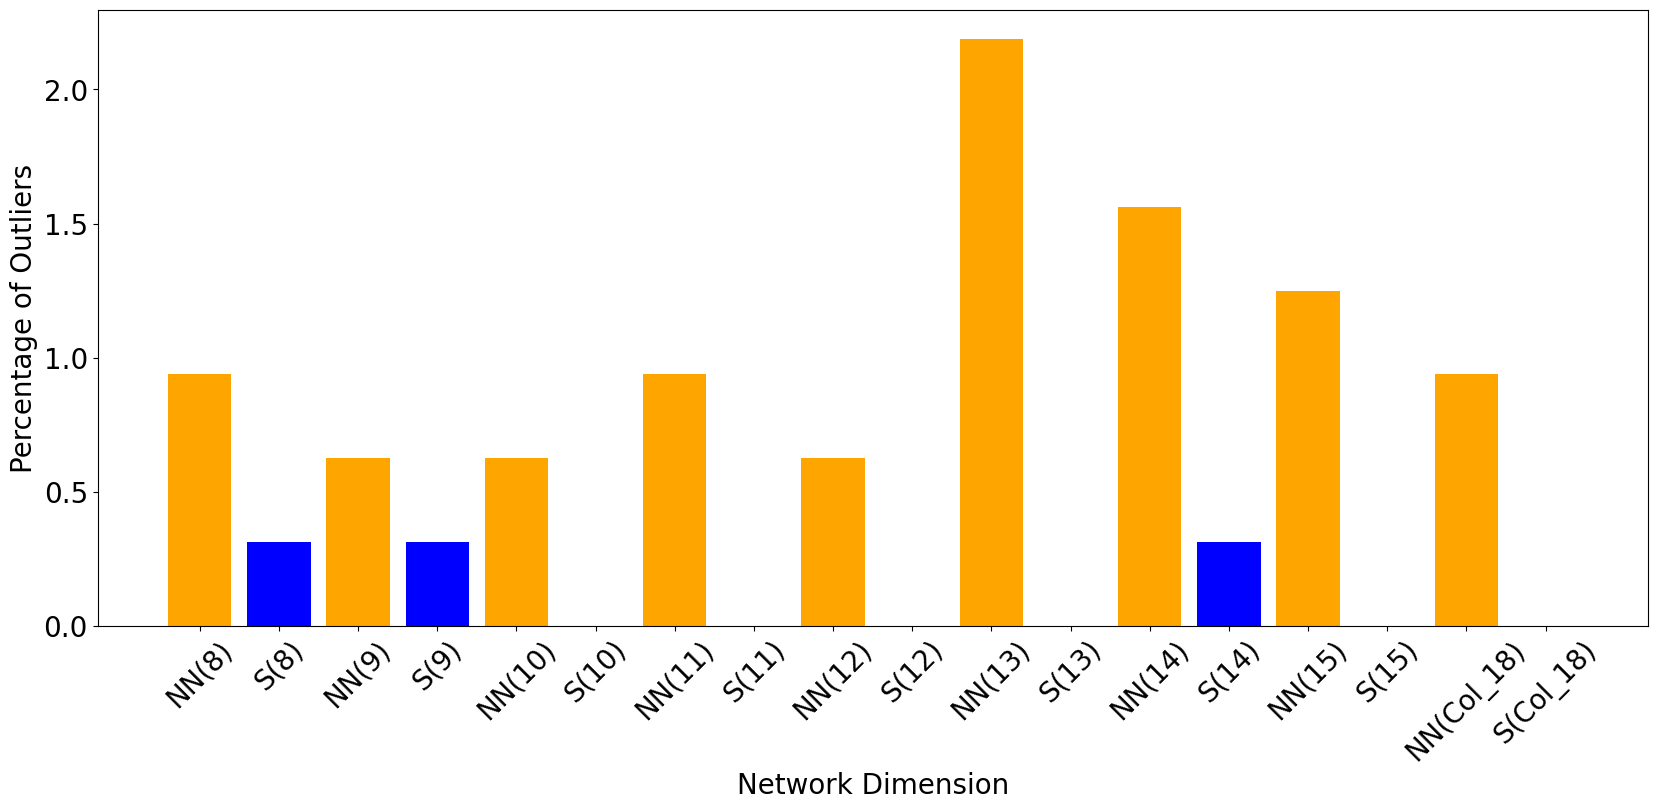

In [5]:
df=Balance
columnas_red = df.columns#[col for col in df.columns if 'S' in col]
print('Porcentaje de atípicos: Balance de nodos')
visualize_atipic(Balance, columnas_red)
print('Porcentaje de atípicos: Weymouth')
visualize_atipic(Weymouth, columnas_red)

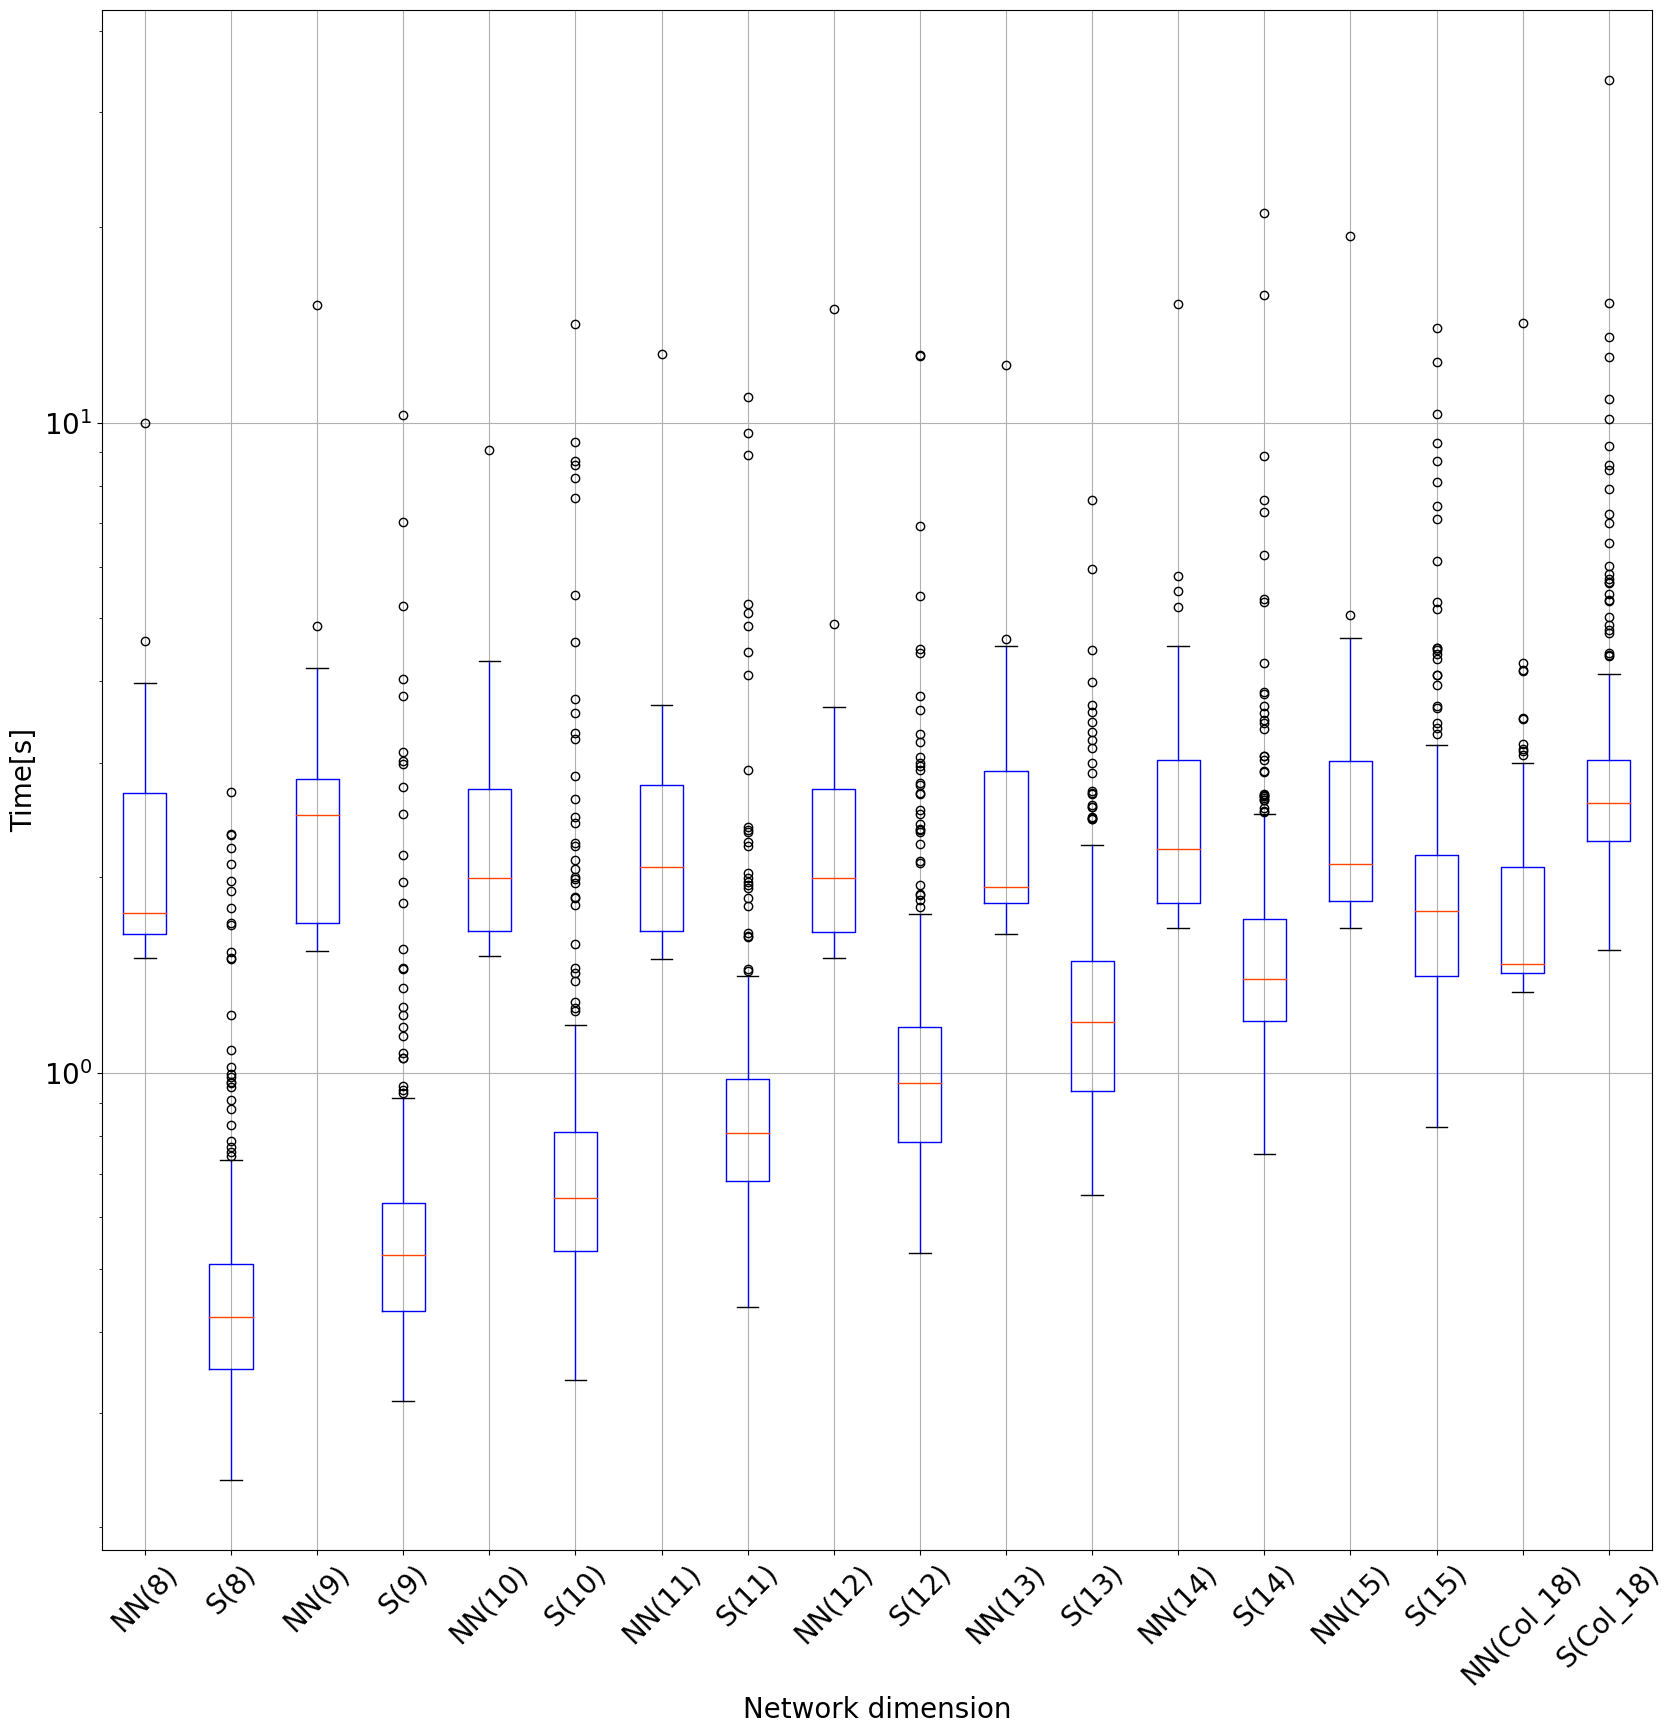

In [6]:
a=plot_time(s=1)

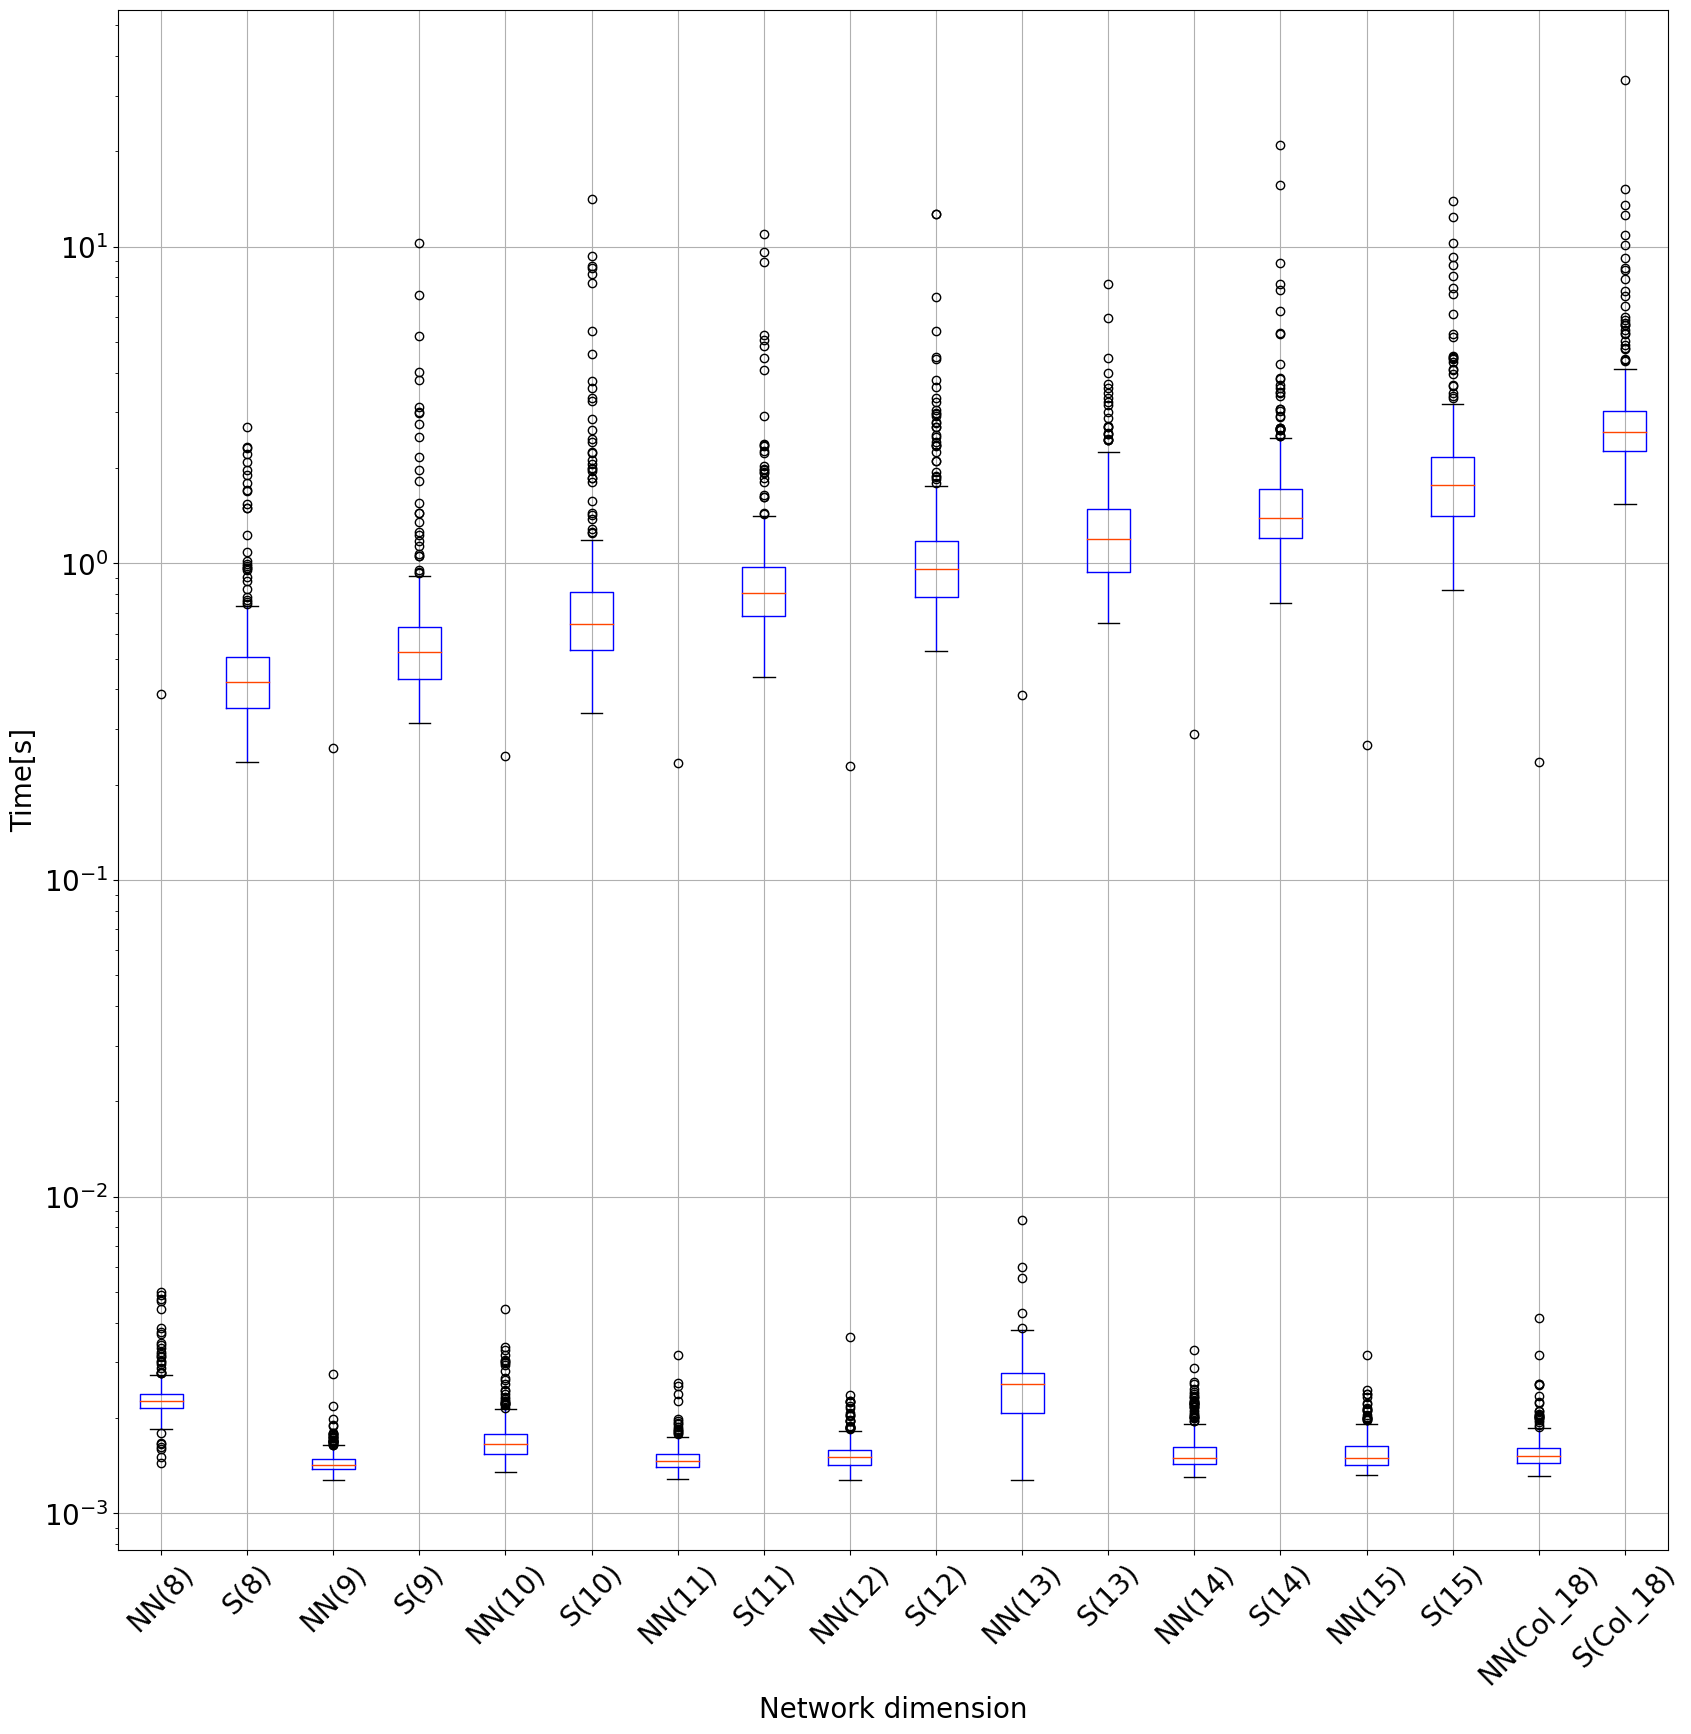

In [7]:
a=plot_time('predict',s=1)

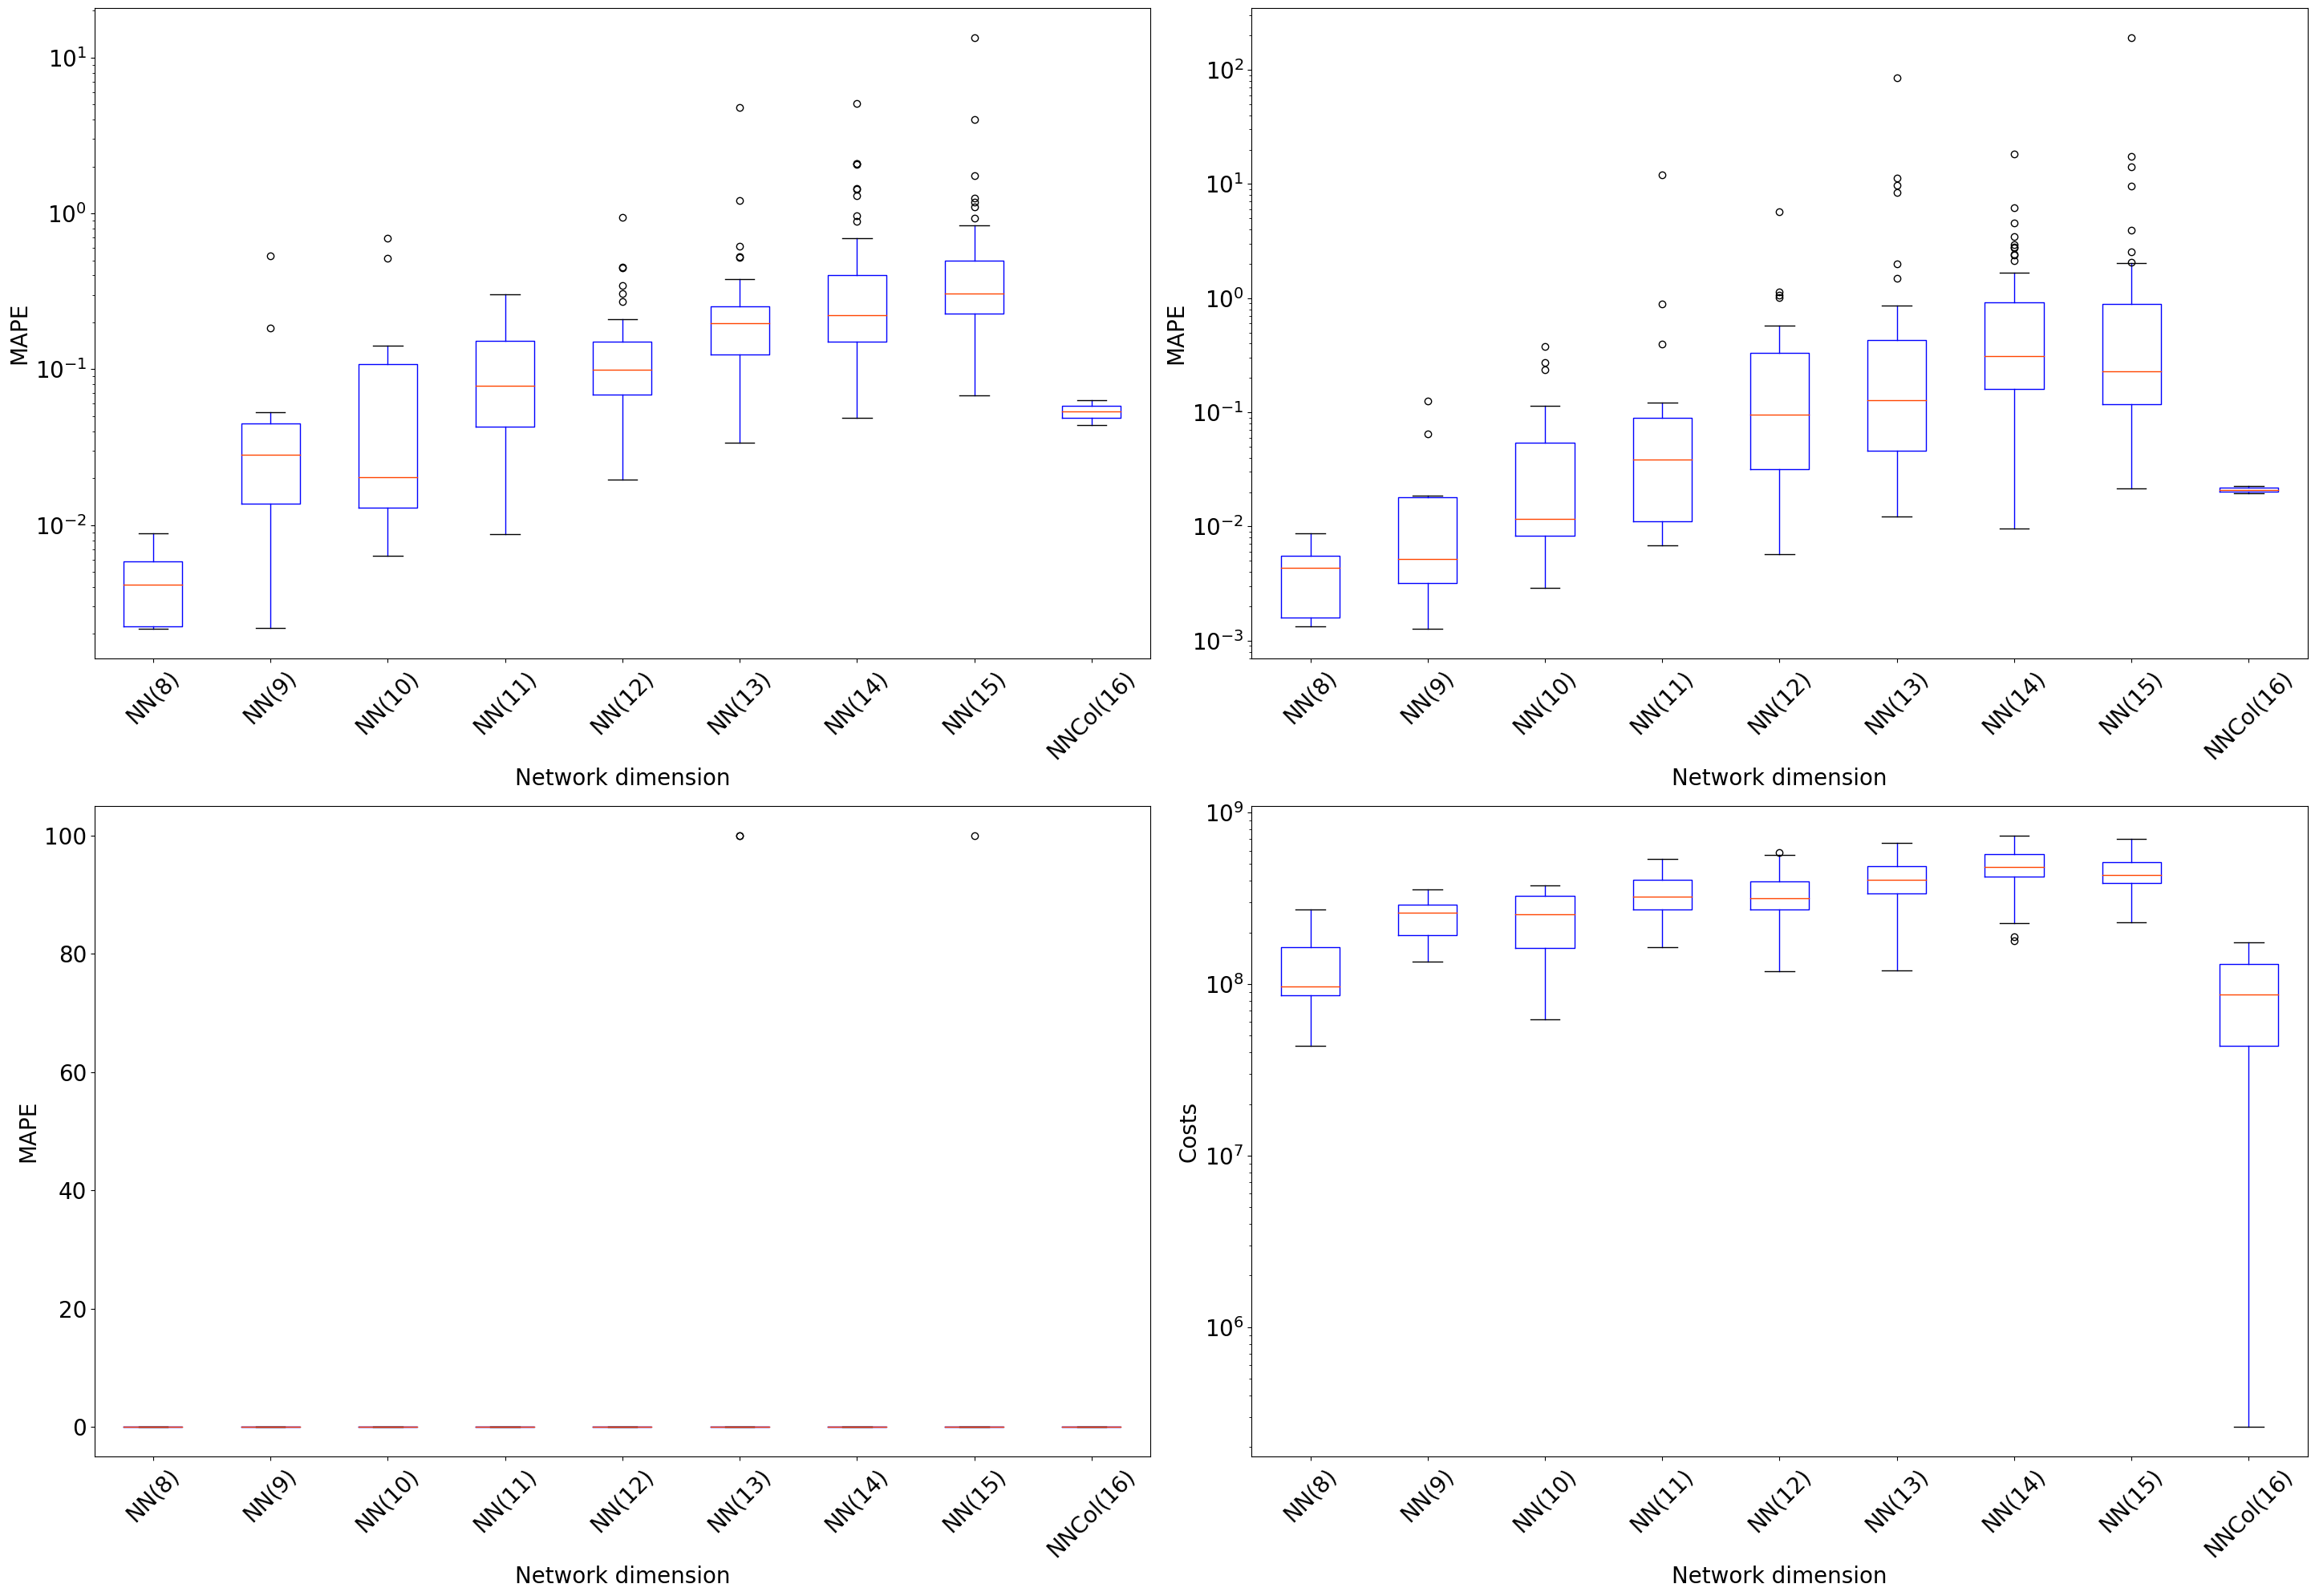

In [8]:
Bal,Wey,_,_=ng_evaluate_atip(s=1)

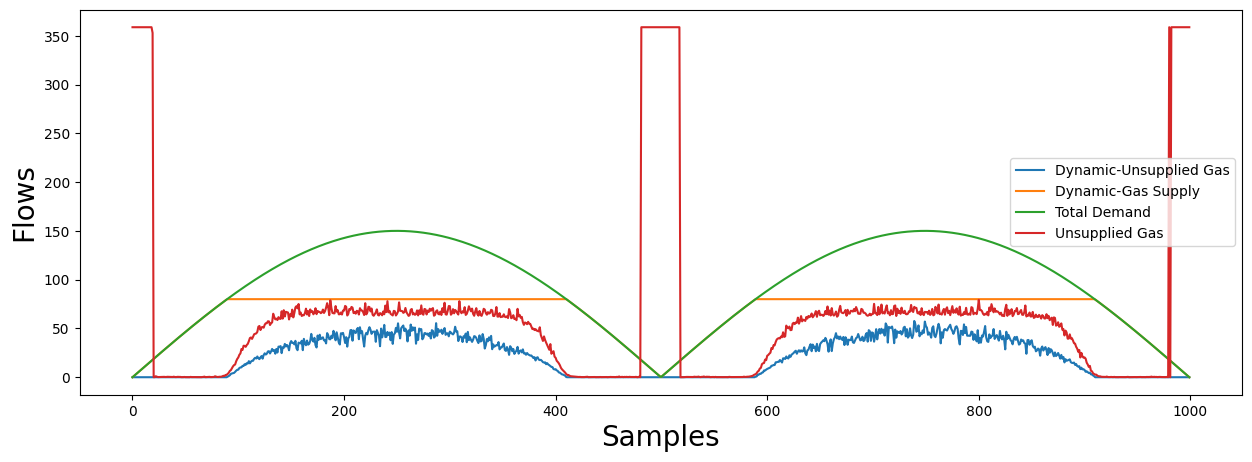

In [9]:
dinamic = dynamic_val()